In [13]:
!pip install azure-storage-blob azure-identity

In [14]:
!pip install azure-ai-formrecognizer

In [15]:
key = "C3pJWnz3EiLRCn572dAPvtch2ePMs7bR840JoosoDspcCPKlKzC5JQQJ99BIACYeBjFXJ3w3AAALACOGi4Pc"
end_point = "https://anishdocs.cognitiveservices.azure.com/"

In [16]:
from azure.core.credentials import AzureKeyCredential
from azure.ai.formrecognizer import DocumentAnalysisClient

credential = AzureKeyCredential(key)
doctument_analysis_client = DocumentAnalysisClient(end_point, credential)

In [17]:
from azure.storage.blob import BlobServiceClient
blob_account_url = "https://azureaiml.blob.core.windows.net"
storage_credential = "e8HN6q8w/WJ85m7BvNLhBAR+79Zj0YepI1Yq6mKvgzVHmS1iLjzhKB7v0Z4erMxRd2YN/YRTtyJF+AStBw+2Vg=="

blob_service_client = BlobServiceClient(account_url=blob_account_url, credential=storage_credential)

blob_service_client

In [18]:
all_containers = blob_service_client.list_containers()
for container in all_containers:
    print(container['name'])

invoice
vscodecontainer


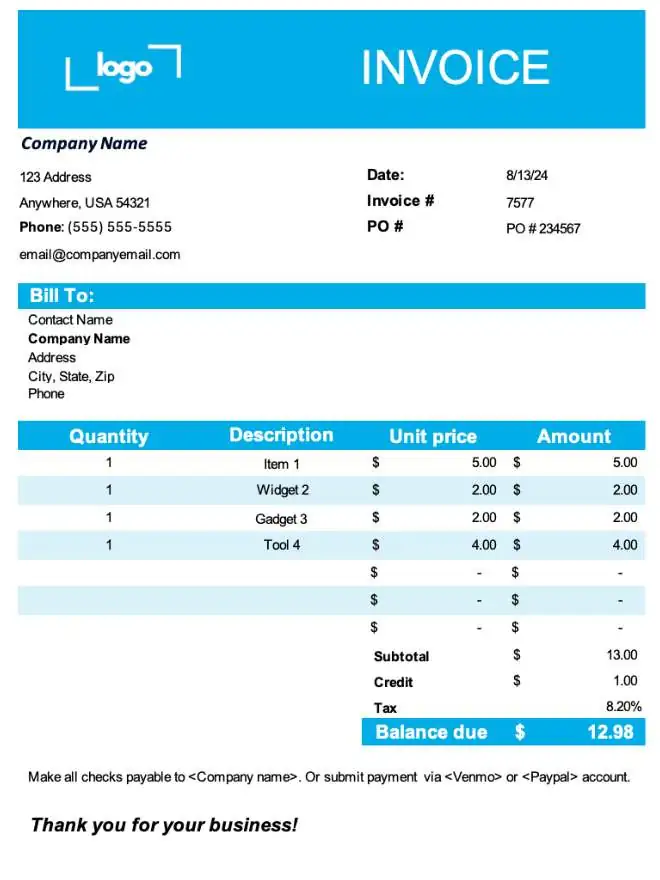

In [19]:
blob_client = blob_service_client.get_blob_client(container="invoice", blob="invoice.jpg")
data = blob_client.download_blob()
from PIL import Image
image = Image.open(data)
image

In [22]:
#Initialize Blob Client

from azure.storage.blob import BlobClient

blob_account_url='https://azureaiml.blob.core.windows.net'

storage_credential='e8HN6q8w/WJ85m7BvNLhBAR+79Zj0YepI1Yq6mKvgzVHmS1iLjzhKB7v0Z4erMxRd2YN/YRTtyJF+AStBw+2Vg=='

blob_url = 'https://azureaiml.blob.core.windows.net/invoice/invoice.jpg'

blob_client = BlobClient.from_blob_url(blob_url=blob_url, credential=storage_credential)



# Download the image invoice from Azure Storage

with open("invoice_image.jpg", "wb") as download_file:
    download_file.write(blob_client.download_blob().readall())

# Analyze the image using Document Intelligence

with open("invoice_image.jpg", "rb") as invoice_image:
    poller = document_analysis_client.begin_analyze_document("prebuilt-invoice", document=invoice_image)
    result = poller.result()

# Print out the extracted data

for idx, invoice in enumerate(result.documents):

    print(f"============Recognise Invoice: {idx + 1}==================")

#for-name, field in invoice.fields.items():

#print(f"{name}: (field.value}")

for i in invoice.fields:

    print(i)
    print(f"{i}: {invoice.fields[i].value}  ")

HttpResponseError: (InvalidRequest) Invalid request.
Code: InvalidRequest
Message: Invalid request.
Inner error: {
    "code": "InvalidContent",
    "message": "The file is corrupted or format is unsupported. Refer to documentation for the list of supported formats."
}

In [21]:
from azure.storage.blob import BlobClient
from azure.ai.formrecognizer import DocumentAnalysisClient
from azure.core.credentials import AzureKeyCredential

# 1. Blob Storage setup
blob_url = 'https://azureaiml.blob.core.windows.net/invoice/invoice.jpg'
storage_credential = 'e8HN6q8w/WJ85m7BvNLhBAR+79Zj0YepI1Yq6mKvgzVHmS1iLjzhKB7v0Z4erMxRd2YN/YRTtyJF+AStBw+2Vg=='

blob_client = BlobClient.from_blob_url(blob_url=blob_url, credential=storage_credential)

# 2. Download file
with open("invoice_image.jpg", "wb") as f:
    f.write(blob_client.download_blob().readall())

# 3. Document Intelligence client
endpoint = "https://anishdocs.cognitiveservices.azure.com/"
key = "C3pJWnz3EiLRCn572dAPvtch2ePMs7bR840JoosoDspcCPKlKzC5JQQJ99BIACYeBjFXJ3w3AAALACOGi4Pc"

document_analysis_client = DocumentAnalysisClient(endpoint=endpoint, credential=AzureKeyCredential(key))

# 4. Analyze invoice
with open("invoice_image.jpg", "rb") as invoice_image:
    poller = document_analysis_client.begin_analyze_document("prebuilt-invoice", document=invoice_image)
    result = poller.result()

# 5. Print results
for idx, invoice in enumerate(result.documents):
    print(f"============ Recognised Invoice: {idx + 1} ==================")
    for name, field in invoice.fields.items():
        print(f"{name}: {field.value}")


HttpResponseError: (InvalidRequest) Invalid request.
Code: InvalidRequest
Message: Invalid request.
Inner error: {
    "code": "InvalidContent",
    "message": "The file is corrupted or format is unsupported. Refer to documentation for the list of supported formats."
}